In [172]:
import random
import time

class Timer(object):
    def __init__(self, verbose=False):
        self.verbose = verbose

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.secs = self.end - self.start
        self.msecs = self.secs * 1000  # millisecs
        if self.verbose:
            print ('elapsed time: %f ms' % self.msecs)

In [ ]:
def seqSearch(x, item):
    for i in x:
        if i == item:
            return True
    return False

In [240]:
def swap(x, i, j):
    x[i], x[j] = x[j], x[i]

def bubbleSort(x):
    for size in reversed(range(len(x))):
        for i in range(size):
            if x[i] > x[i+1]:
                swap(x, i, i+1)
                
def selectionSort(x):
    for size in reversed(range(len(x))):
        max_i = 0
        for i in range(1, 1+size):
            if x[i] > x[max_i]:
                max_i = i
        swap(x, max_i, size)

def insertionSort(x):
    size = 1
    while size < len(x):
        val = x[size]
        i = size
        while i > 0:
            if x[i-1] > val:
                x[i] = x[i-1]
            else:
                break
            i -= 1
        x[i] = val
        size += 1

def shellSort(x):
    gap = len(x)//2
    while gap > 0:
        for i in range(gap):
            def gapInsertionSort(x, i, gap):
                tmp_x = x[i::gap] #pythonic exp. >> memory!
                insertionSort(tmp_x)
                x[i::gap] = tmp_x
            gapInsertionSort(x, i, gap)
        gap -= 1


def mergeSort(x):
    if len(x) > 1:
        mid = len(x)//2
        lx, rx = x[:mid], x[mid:]
        mergeSort(lx)
        mergeSort(rx)

        li, ri = 0, 0
        i = 0

        while li < len(lx) and ri < len(rx):
            if lx[li] < rx[ri]:
                x[i] = lx[li]
                li += 1
            else:
                x[i] = rx[ri]
                ri += 1
            i += 1
        x[i:] = lx[li:] if li != len(lx) else rx[ri:]

def quickSort(x, pivotMethod=pivotFirst):
    def _qsort(x, first, last):
        if first < last:
            splitpoint = pivotMethod(x, first, last)
            _qsort(x, first, splitpoint-1)
            _qsort(x, splitpoint+1, last)
    _qsort(x, 0, len(x)-1)

def pivotFirst(x, lmark, rmark):
    pivot_val = x[lmark]
    pivot_idx = lmark
    while lmark <= rmark:
        while lmark <= rmark and x[lmark] <= pivot_val:
            lmark += 1
        while lmark <= rmark and x[rmark] >= pivot_val:
            rmark -= 1
        if lmark <= rmark:
            swap(x, lmark, rmark)
            lmark += 1
            rmark -= 1
    swap(x, pivot_idx, rmark)
    return rmark

def pivotMedianMideum(x, lmark, rmark):
    mid = (lmark + rmark)//2
    if x[lmark] < x[mid]:
        if x[mid] < x[rmark]:
            pivot_idx = mid
        else:
            pivot_idx = rmark if x[lmark] < x[rmark] else lmark
    else:
        if x[rmark] < x[mid]:
            pivot_idx = mid
        else:
            pivot_idx = lmark if x[lmark] < x[rmark] else rmark
    pivot_val = x[pivot_idx]
    
    while lmark <= rmark:
        while lmark <= rmark and x[lmark] <= pivot_val:
            lmark += 1
        while lmark <= rmark and x[rmark] >= pivot_val:
            rmark -= 1
        if lmark <= rmark:
            swap(x, lmark, rmark)
            lmark += 1
            rmark -= 1
    swap(x, pivot_idx, rmark)
    return rmark

def pivotMedianRandom(x, lmark, rmark):
    if rmark - lmark > 2:
        a, b, c = random.sample(list(range(lmark,rmark+1)), 3)
        if x[a] < x[b]:
            if x[b] < x[c]:
                pivot_idx = b
            else:
                pivot_idx = c if x[a] < x[c] else a
        else:
            if x[rmark] < x[b]:
                pivot_idx = b
            else:
                pivot_idx = a if x[a] < x[c] else c
    else:
        pivot_idx = (lmark + rmark)//2
    pivot_val = x[pivot_idx]
    
    while lmark <= rmark:
        while lmark <= rmark and x[lmark] <= pivot_val:
            lmark += 1
        while lmark <= rmark and x[rmark] >= pivot_val:
            rmark -= 1
        if lmark <= rmark:
            swap(x, lmark, rmark)
            lmark += 1
            rmark -= 1
    swap(x, pivot_idx, rmark)
    return rmark

def pivotRandom(x, lmark, rmark):
    pivot_idx = random.randrange(lmark, rmark)
    pivot_val = x[pivot_idx]
    
    while lmark <= rmark:
        while lmark <= rmark and x[lmark] <= pivot_val:
            lmark += 1
        while lmark <= rmark and x[rmark] >= pivot_val:
            rmark -= 1
        if lmark <= rmark:
            swap(x, lmark, rmark)
            lmark += 1
            rmark -= 1
    swap(x, pivot_idx, rmark)
    return rmark

In [223]:
def randomData(ans):
    x = ans[:]
    random.shuffle(x)
    return x

def sortedData(ans):
    return ans[:]

def reversedData(ans):
    x = ans[:]
    return [x[i] for i in reversed(range(len(x)))]

def nearlySortedData(ans):
    x = ans[:]
    rg = 5
    for i in range(len(x)-rg+1):
        idx = random.sample(list(range(i,i+rg)), rg)
        x[i:i+rg] = [x[i] for i in idx]
    return x

def getStr(ftn):
    return str(ftn).split(' ')[1]

tmp = list(range(10))
print(
    randomData(tmp),
    sortedData(tmp),
    reversedData(tmp),
    nearlySortedData(tmp),
)

[3, 0, 4, 2, 7, 9, 1, 5, 8, 6] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [9, 8, 7, 6, 5, 4, 3, 2, 1, 0] [4, 2, 6, 1, 0, 3, 9, 8, 5, 7]


In [244]:
alglist = [bubbleSort, selectionSort, insertionSort, shellSort, mergeSort, quickSort]
# dtypelist = [randomData]
dtypelist = [sortedData, nearlySortedData, randomData, reversedData]
dsizelist = [100, 500, 1000]


from itertools import product
import sys
sys.setrecursionlimit(10000)

num_iter = 30

#output formatting
out = ','.join(['algorithm','data_type','data_size','time(ms)','correct'])
out += '\n'

for n in dsizelist:
    #data setting
    ans = list(range(n))
    #experimental setting
    for alg, dtype in product(alglist, dtypelist):
        for i in range(num_iter):
            x = dtype(ans)
            with Timer(verbose=False) as t:
                alg(x)
            out += ','.join([
                getStr(alg), 
                getStr(dtype), 
                str(n),
                '{:.2f}'.format(t.msecs),
                '{}'.format(x==ans)
            ])
            out += '\n'
print(out)

algorithm,data_type,data_size,time(ms),correct
bubbleSort,sortedData,100,0.48,True
bubbleSort,sortedData,100,0.48,True
bubbleSort,sortedData,100,0.48,True
bubbleSort,sortedData,100,0.48,True
bubbleSort,sortedData,100,0.48,True
bubbleSort,sortedData,100,0.48,True
bubbleSort,sortedData,100,0.58,True
bubbleSort,sortedData,100,0.78,True
bubbleSort,sortedData,100,0.50,True
bubbleSort,sortedData,100,0.71,True
bubbleSort,sortedData,100,0.50,True
bubbleSort,sortedData,100,0.57,True
bubbleSort,sortedData,100,0.60,True
bubbleSort,sortedData,100,0.57,True
bubbleSort,sortedData,100,0.49,True
bubbleSort,sortedData,100,0.58,True
bubbleSort,sortedData,100,0.55,True
bubbleSort,sortedData,100,0.63,True
bubbleSort,sortedData,100,1.35,True
bubbleSort,sortedData,100,1.07,True
bubbleSort,sortedData,100,1.11,True
bubbleSort,sortedData,100,1.13,True
bubbleSort,sortedData,100,1.03,True
bubbleSort,sortedData,100,1.58,True
bubbleSort,sortedData,100,1.00,True
bubbleSort,sortedData,100,1.43,True
bubbleSort,sorted

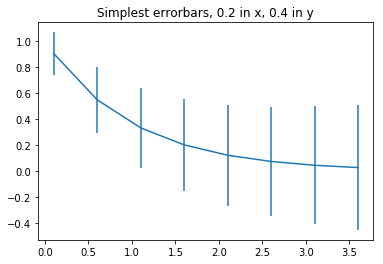

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, yerr=yerr)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")
plt.show()